In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from tabulate import tabulate
from functions_dependency_test import find_dependent_chi, p_of_chi_squared
from Data_transformations import feature_cleaning, values_cleaning, missing_values_removing
plt.style.use("seaborn")

In [40]:
df = pd.read_csv('Murder_Data.zip', index_col=0, compression='zip')
df.insert(1, 'County', df['CNTYFIPS'].map(lambda x : str(x).split(',')[0]), True)
df.drop("CNTYFIPS",axis = 1, inplace= True) # redundant, onlyy keeping the county part
df.drop("StateName",axis = 1, inplace= True)  # redundant, contains state
df.drop("Ori",axis = 1, inplace= True)  # redundant, contains state + county + agentcy nb
df.insert(3, 'Area',df['MSA'].map(lambda x :  str(x).split(',')[0] ) ,True)
df.drop('MSA',axis = 1,inplace=True) # rendundant only the state, keeping the metropolitant statistical area
# split File Date in Day-Month-Year columns
nan_indexes = df["FileDate"].isna()
df['FileDate'].fillna(0,inplace = True)
df['FileDate'] = df['FileDate'].astype(int)
df['FileDate'] = df['FileDate'].astype(str)
df.insert(1, 'File Year', df['FileDate'].map(lambda x : x[len(x)-2:len(x)]), True)
df.insert(1, 'File Day', df['FileDate'].map(lambda x : x[len(x)-4:len(x)-2]), True)
df.insert(1, 'File Month', df['FileDate'].map(lambda x : x[0:len(x)-4]), True)
df.loc[nan_indexes,"File Year"] = np.NaN
df.loc[nan_indexes,"File Day"] = np.NaN
df.loc[nan_indexes,"File Month"] = np.NaN
df.drop("FileDate",axis = 1,inplace = True)
df.drop("Incident",axis = 1,inplace = True) # incient number of the month, for a specific county useless for our application
df.drop("Situation",axis = 1,inplace = True) # redundant, info already contained in OffCount and VicCount

# data_pp = values_cleaning(feature_cleaning(data_original))
# data_pp.head()

# drop ID column, as it has too many values -> computation of Chi-squared takes too long
data = pd.read_csv('non_empty_sample.csv', index_col=0)
data_mod = data.drop(['ID'], axis = 1)

/Users/thomas/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
def df_heatmap_chi(data: pd.DataFrame) -> pd.DataFrame:
    num_features = len(data.columns)
    p_values = np.zeros(shape=(num_features, num_features))
    for i in range(num_features):
        for j in range(i, len(data.columns)):
            p = p_of_chi_squared(data.iloc[:, i], data.iloc[:, j])
            p_values[i][j] = p
            p_values[j][i] = p
    return pd.DataFrame(p_values, index=data.columns, columns=data.columns)

In [33]:
df_heat = df_heatmap_chi(data_mod)
df_heat.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,...,OffSex,OffRace,Weapon,Relationship,Circumstance,VicCount,OffCount,FileDate,fstate,MSA
CNTYFIPS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.925932e-180,...,2.071277e-263,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
Ori,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.522710e-320,...,1.325600e-186,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
State,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.703581e-95,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
Agency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.983381e-248,...,2.084418e-180,0.0,0.0,0.0,0.0,0.0,2.859316e-139,0.0,0.0,0.0
Agentype,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.707776e-08,...,6.249890e-18,0.0,0.0,0.0,0.0,0.0,2.107465e-104,0.0,0.0,0.0


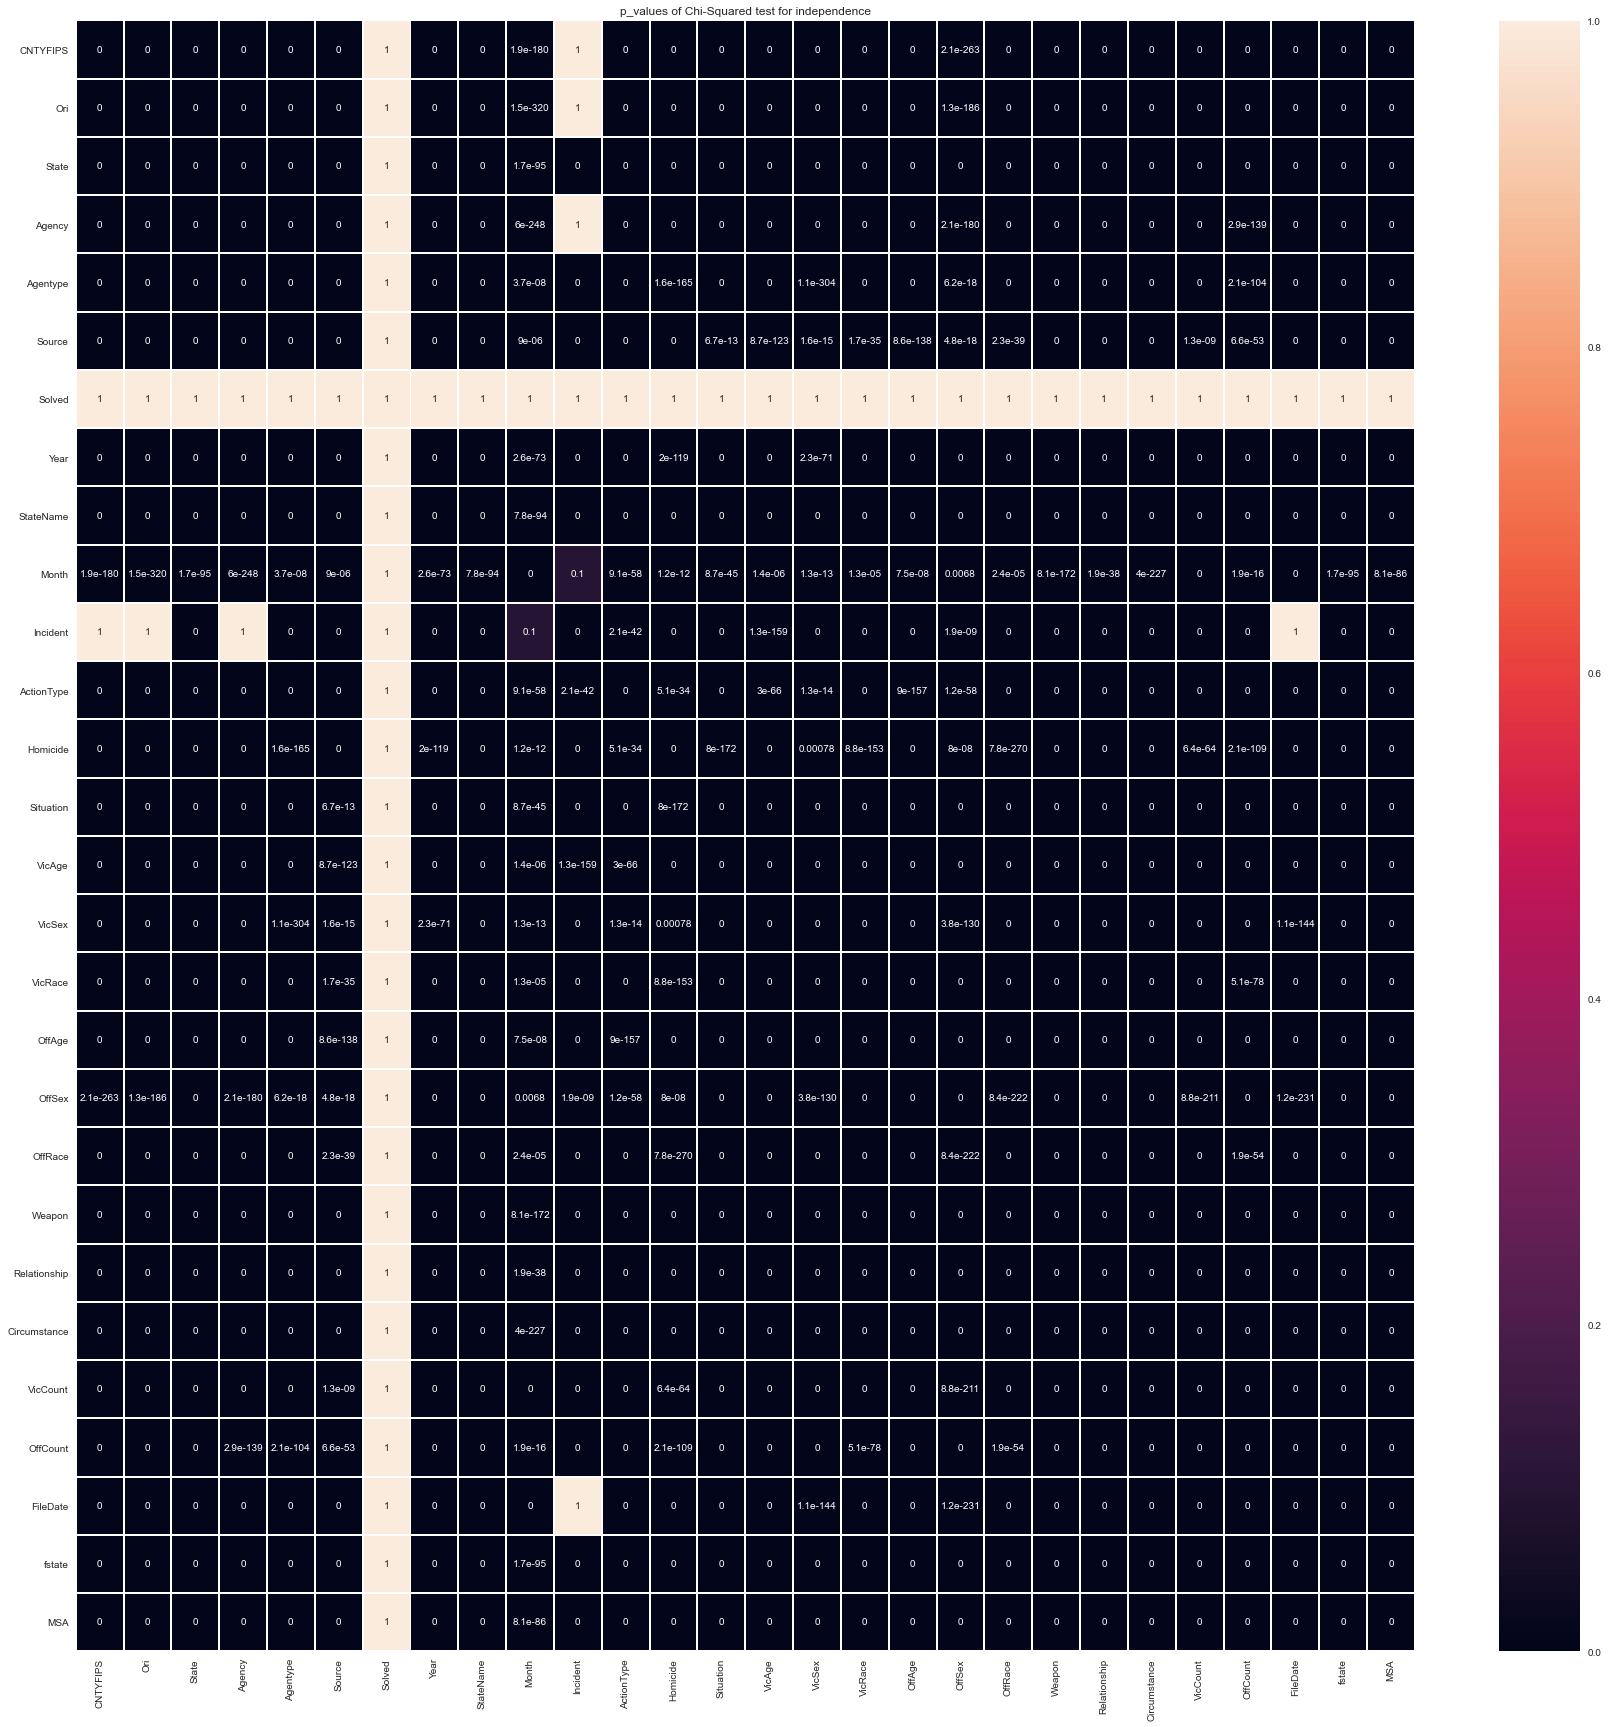

In [47]:
plt.figure(figsize=(30,30))
heat_map = sns.heatmap(df_heat, linewidth = 1 , robust = True, annot = True)
plt.title("p_values of Chi-Squared test for independence")
plt.show()

In [41]:
df_test = df_heatmap_chi(df)
df_test.head(20)

,County,File Month,File Day,File Year,State,Agency,Area,Agentype,Source,Solved,...,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount
County,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
File Month,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.559583e-72,0.000000e+00,0.000000e+00
File Day,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.189626e-93,0.000000e+00,0.000000e+00
File Year,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
State,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
Agency,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,7.435482e-08
Area,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
Agentype,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,4.229583e-87,0.000000e+00,6.611757e-27
Source,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.033900e-02,...,0.000000e+00,2.342146e-27,9.029114e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.496100e-73,5.548746e-74,4.867762e-130
Solved,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.033900e-02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.479182e-203,5.232424e-159,0.000000e+00


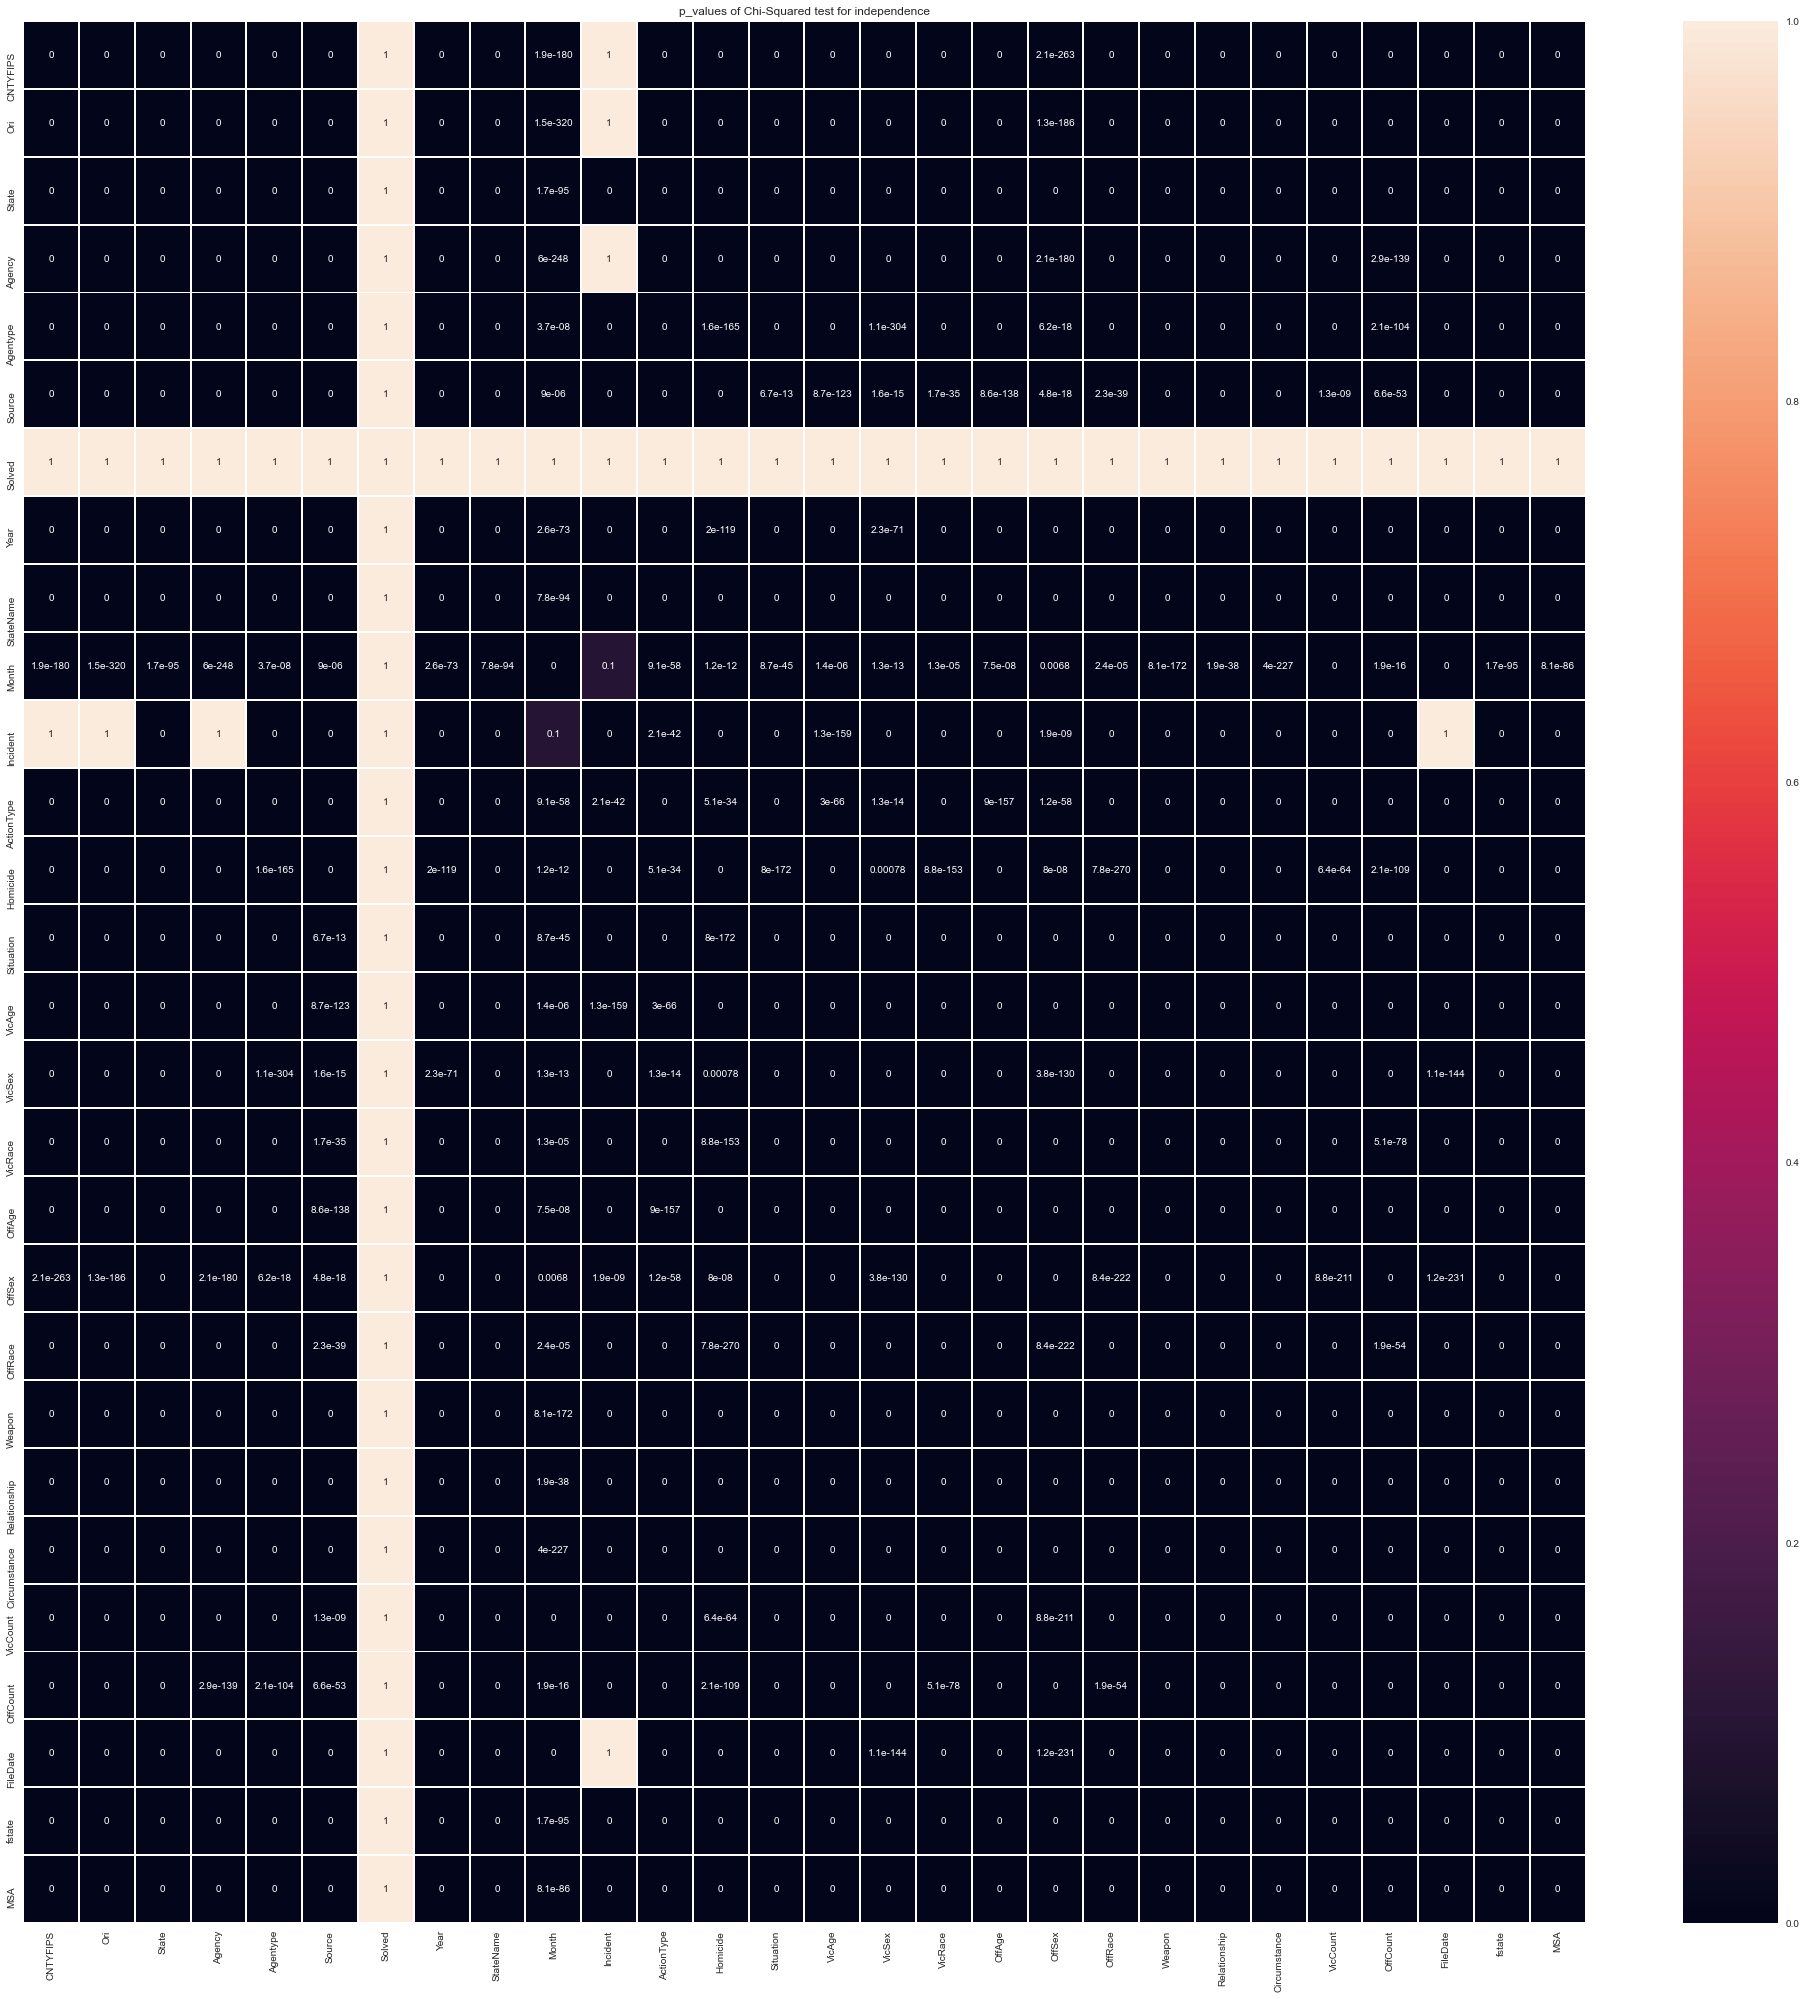

In [54]:
plt.figure(figsize=(35,35))
heat_map = sns.heatmap(df_heat, linewidth = 1 , annot = True)
plt.title("p_values of Chi-Squared test for independence")
plt.show()

In [53]:
df['Solved'].value_counts()

Yes    583230
No     243989
Name: Solved, dtype: int64

In [5]:
dep = find_dependent_chi(data_mod, 0.05)
print(tabulate(dep, headers='keys', tablefmt='psql'))

+-----+--------------+--------------+--------------+
|     | Feature 1    | Feature 2    |      p-value |
|-----+--------------+--------------+--------------|
|   0 | CNTYFIPS     | Ori          | 0            |
| 272 | Homicide     | MSA          | 0            |
| 271 | Homicide     | fstate       | 0            |
| 270 | Homicide     | FileDate     | 0            |
| 267 | Homicide     | Circumstance | 0            |
| 266 | Homicide     | Relationship | 0            |
| 265 | Homicide     | Weapon       | 0            |
| 262 | Homicide     | OffAge       | 0            |
| 259 | Homicide     | VicAge       | 0            |
| 257 | ActionType   | MSA          | 0            |
| 256 | ActionType   | fstate       | 0            |
| 255 | ActionType   | FileDate     | 0            |
| 254 | ActionType   | OffCount     | 0            |
| 253 | ActionType   | VicCount     | 0            |
| 252 | ActionType   | Circumstance | 0            |
| 251 | ActionType   | Relationship | 0       